# USED CAR PRICE PREDICTOR
Predicting used car selling price.

# LOAD DATASET

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nehalbirla/vehicle-dataset-from-cardekho",  # This is the dataset handle
  "Car details v3.csv"
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df

/tmp/ipython-input-4-3995800518.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# IMPORT MODULE & PACKAGE

In [ ]:
!pip install fuzzywuzzy python-Levenshtein
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.base import clone
# from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.1 MB/s eta 0:00:00


# DATA CLEANING

In [ ]:
rows, cols = df.shape

print("Jumlah baris:", rows)
print("Jumlah kolom:", cols)

Jumlah baris: 8128
Jumlah kolom: 13


Handle Null values

In [ ]:
null_col = df.isna().sum()
null_col

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
# Create a list of columns to check for nulls
cols_to_check = ['mileage', 'engine', 'max_power', 'torque', 'seats']

# Drop rows where any of the specified columns have a null value
df = df.dropna(subset=cols_to_check)

null_col = df.isna().sum()
null_col

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [ ]:
# jumlah baris sekarang
rows, cols = df.shape

print("Jumlah baris:", rows)

Jumlah baris: 7906


Cast Data Type

In [ ]:
df.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,object
engine,object


In [ ]:
df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")
df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")
df["max_power"] = df["max_power"].str.extract(r'(\d+\.?\d*)', expand=False).astype("float")
df

/tmp/ipython-input-11-4225513048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")
/tmp/ipython-input-11-4225513048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")
/tmp/ipython-input-11-4225513048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [ ]:
df["torque"].unique().shape[0] # 441 masih tergolong kecil dibanding 8000-an data yg ada

441

In [ ]:
# Set object data types to their supposed data types
df['name'] = df['name'].astype('string')
df['fuel'] = df['fuel'].astype('string')
df['seller_type'] = df['seller_type'].astype('string')
df['transmission'] = df['transmission'].astype('string')
df['owner'] = df['owner'].astype('string')
df['torque'] = df['torque'].astype('string')
df.dtypes

/tmp/ipython-input-13-2846278577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].astype('string')
/tmp/ipython-input-13-2846278577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].astype('string')
/tmp/ipython-input-13-2846278577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,0
name,string[python]
year,int64
selling_price,int64
km_driven,int64
fuel,string[python]
seller_type,string[python]
transmission,string[python]
owner,string[python]
mileage,float64
engine,float64


Remove any duplicate

In [ ]:
# Cek berapa data yang duplikat
duplicates = df[df.duplicated()]
print("Duplicate rows:", duplicates.shape[0])

Duplicate rows: 1189


In [ ]:
df = df.drop_duplicates().reset_index(drop=True)
# Check sudah ke delete atau belum
print("Jumlah row duplicate:", df[df.duplicated()].shape[0])
print("Jumlah row setelah remove duplicate:", df.shape[0])

Jumlah row duplicate: 0
Jumlah row setelah remove duplicate: 6717


Handle Inconsistent Data

In [ ]:
# Check hard value (fuel, seller_type, transmission, dan owner) punya unique values sesuai ketentuan
df.nunique()
# Sudah sesuai

,0
name,1982
year,27
selling_price,670
km_driven,898
fuel,4
seller_type,3
transmission,2
owner,5
mileage,381
engine,121


In [ ]:
# Cek inconsistency of raw names
unique_car_names = sorted(df['name'].unique())

for name in unique_car_names:
  print(name)

Ambassador CLASSIC 1500 DSL AC
Ambassador Classic 2000 DSZ AC PS
Ambassador Grand 1500 DSZ BSIII
Ambassador Grand 2000 DSZ PW CL
Ashok Leyland Stile LE
Audi A3 35 TDI Premium Plus
Audi A3 40 TFSI Premium
Audi A4 1.8 TFSI
Audi A4 2.0 TDI
Audi A4 2.0 TDI 177 Bhp Premium Plus
Audi A4 35 TDI Premium Plus
Audi A6 2.0 TDI
Audi A6 2.0 TDI  Design Edition
Audi A6 2.0 TDI Premium Plus
Audi A6 2.0 TDI Technology
Audi A6 35 TFSI Matrix
Audi Q3 2.0 TDI Quattro Premium Plus
Audi Q3 35 TDI Quattro Premium Plus
Audi Q3 35 TDI Quattro Technology
Audi Q5 2.0 TDI
Audi Q5 3.0 TDI Quattro
Audi Q5 35TDI Premium Plus
Audi Q5 45 TDI quattro Technology
Audi Q7 3.0 TDI Quattro
Audi Q7 3.0 TDI Quattro Premium Plus
Audi Q7 35 TDI Quattro Premium
BMW 3 Series 320d
BMW 3 Series 320d Corporate Edition
BMW 3 Series 320d GT Luxury Line
BMW 3 Series 320d Highline
BMW 3 Series 320d Luxury Line
BMW 3 Series 320d Luxury Line Plus
BMW 3 Series 320d Luxury Plus
BMW 3 Series 320d Prestige
BMW 3 Series 320d Sedan
BMW 3 Serie

In [ ]:
from fuzzywuzzy import process
# Ubah menjadi nama model yang konsisten
# Semua raw unique valuesnya nama
unique_names = df['name'].unique()

# Set threshold 100 karena cari yang exact match
threshold = 100
standardization_mapping = {}
processed_names = set()
similar_names = {}

for name in unique_names:
    if name in processed_names:
        continue  # Lewati jika nama sudah diproses sebelumnya

    matches = process.extract(name, unique_names, limit=5)

    similar_matches = [match for match in matches if match[0] != name and match[1] >= threshold]

    if similar_matches:
      similar_names[name] = similar_matches

    for match_name, score in similar_matches:
        if match_name not in processed_names:
            standardization_mapping[match_name] = name
            processed_names.add(match_name)

    processed_names.add(name)

# Print the groups of similar names
for name, matches in similar_names.items():
  print(f"'{name}' mirip dengan:")
  for match in matches:
    print(f"  - '{match[0]}' (Score: {match[1]})")

# Ganti nama-nama yang tidak konsisten di Dataframe
df['name'] = df['name'].replace(standardization_mapping)



'Maruti Swift Dzire VDI' mirip dengan:
  - 'Maruti Swift Dzire VDi' (Score: 100)
'Maruti Swift Dzire ZDI' mirip dengan:
  - 'Maruti Swift Dzire ZDi' (Score: 100)
'Honda City i VTEC VX' mirip dengan:
  - 'Honda City i-VTEC VX' (Score: 100)
'Honda City i DTEC S' mirip dengan:
  - 'Honda City i DTec S' (Score: 100)
'Honda City i DTEC VX' mirip dengan:
  - 'Honda City i-DTEC VX' (Score: 100)
  - 'Honda City i DTec VX' (Score: 100)
'Hyundai i20 Asta Optional with Sunroof 1.2' mirip dengan:
  - 'Hyundai i20 Asta Optional With Sunroof 1.2' (Score: 100)
'Maruti Swift Dzire LDI' mirip dengan:
  - 'Maruti Swift Dzire LDi' (Score: 100)
'Tata Indigo CS LS (TDI) BS-III' mirip dengan:
  - 'Tata Indigo CS LS (TDI) BS III' (Score: 100)
'Maruti Swift Dzire VXI' mirip dengan:
  - 'Maruti Swift Dzire VXi' (Score: 100)
'Maruti Alto LXi' mirip dengan:
  - 'Maruti Alto LXI' (Score: 100)
'Honda City i-VTEC CVT VX' mirip dengan:
  - 'Honda City i VTEC CVT VX' (Score: 100)
'Honda City i VTEC S' mirip dengan:
 

In [ ]:
# Cek sudah direplace atau belum
df['name'].nunique()

1954

In [ ]:
from fuzzywuzzy import process

# Semua raw unique valuesnya nama
unique_car_names = df['name'].unique()

# Set 98 threshold karena ingin mencari kemiripan minor yang signifikan
threshold = 98

# Cari nama yang mirip
similar_names = {}
for name in unique_car_names:
  matches = process.extract(name, unique_car_names, limit=5) # 5 teratas

  # Filter
  similar_matches = [match for match in matches if match[0] != name and match[1] >= threshold]

  if similar_matches:
    similar_names[name] = similar_matches

# Cek hasil
for name, matches in similar_names.items():
  print(f"'{name}' mirip dengan:")
  for match in matches:
    print(f"  - '{match[0]}' (Score: {match[1]})")

'Maruti Wagon R LXI Minor' mirip dengan:
  - 'Maruti Wagon R LX Minor' (Score: 98)
'Chevrolet Enjoy TCDi LTZ 7 Seater' mirip dengan:
  - 'Chevrolet Enjoy TCDi LT 7 Seater' (Score: 98)
'Toyota Innova 2.5 G (Diesel) 7 Seater BS IV' mirip dengan:
  - 'Toyota Innova 2.5 G (Diesel) 8 Seater BS IV' (Score: 98)
'Toyota Innova 2.5 G (Diesel) 7 Seater' mirip dengan:
  - 'Toyota Innova 2.5 GX (Diesel) 7 Seater' (Score: 99)
'Maruti Celerio ZXI MT BSIV' mirip dengan:
  - 'Maruti Celerio ZXI AMT BSIV' (Score: 98)
'Maruti Alto LX BSIII' mirip dengan:
  - 'Maruti Alto LXi BSIII' (Score: 98)
'Hyundai Santro Xing GLS' mirip dengan:
  - 'Hyundai Santro Xing GL' (Score: 98)
'Honda Amaze S i-VTEC' mirip dengan:
  - 'Honda Amaze S i-Vtech' (Score: 98)
'Honda City i-VTEC CVT VX' mirip dengan:
  - 'Honda City i-VTEC CVT V' (Score: 98)
'Tata Nexon 1.5 Revotorq XZA Plus DualTone' mirip dengan:
  - 'Tata Nexon 1.5 Revotorq XZ Plus Dual Tone' (Score: 98)
'Hyundai Xcent 1.2 Kappa S' mirip dengan:
  - 'Hyundai Xce

In [ ]:
# Replace manual minor yang belum termasuk hasil replace sebelumnya
# Ambil dari 98 similarity
replace_dict = {
    'Hyundai i10 Magna 1.1L': 'Hyundai i10 Magna 1.1',
    'Maruti Wagon R LX BS IV': 'Maruti Wagon R LXI BS IV',
    'Mahindra Xylo D2 BSIV': 'Mahindra Xylo D2 BS IV',
    'Mahindra Scorpio SLE BSIV': 'Mahindra Scorpio SLE BS IV',
    'Honda Amaze EX i-Dtech': 'Honda Amaze EX i-DTEC',
    'Honda Amaze VX Diesel BSIV': 'Honda Amaze VX Diesel BS IV',
    'Honda Amaze S i-Dtech': 'Honda Amaze S i-DTEC',
    'Maruti Wagon R VXI BSIII': 'Maruti Wagon R VXI BSII',
    'Mahindra Xylo D2 BS IV': 'Mahindra Xylo D2 BSIV',
    'Maruti Wagon R VXi BSII': 'Maruti Wagon R VXI BSII',
    'Honda Amaze E i-Vtech': 'Honda Amaze E i-VTEC',
    'Maruti Celerio ZXI MT BSIV': 'Maruti Celerio ZXI AMT BS IV'
}


# Ganti berdasarkan manual mapping
df['name'] = df['name'].replace(replace_dict)

# Mengubah penulisan bagian string yang tidak konsisten menjadi satu standard dengan regex

import re

# Standarisasi: ubah 'lxi' dan 'vxi' ke kapital penuh
df['name'] = df['name'].str.replace(r'\blxi\b', 'LXI', flags=re.IGNORECASE, regex=True)
df['name'] = df['name'].str.replace(r'\bvxi\b', 'VXI', flags=re.IGNORECASE, regex=True)

# Standarisasi: i vtec & i dtec
df['name'] = df['name'].str.replace(r'i[- ]?vtech', 'i-VTEC', flags=re.IGNORECASE, regex=True)
df['name'] = df['name'].str.replace(r'i[- ]?dtech', 'i-DTEC', flags=re.IGNORECASE, regex=True)

# Format standar BS (angka romawi) ke BS-(angka romawi)
df['name'] = df['name'].str.replace(r'\bBS[ ]?([IVX]+)\b', r'BS-\1', flags=re.IGNORECASE, regex=True)

# Cek sudah direplace atau belum
df['name'].nunique()

# # Drop name for irrelevancy
# df = df.drop('name',  axis=1)

1947

Handling Outliers |
https://neuraldatascience.io/5-eda/data_cleaning.html

In [ ]:
# # Check for outliers using IQR (Interquartile)
# q1 = df['selling_price'].quantile(0.25)
# q3 = df['selling_price'].quantile(0.75)
# iqr = q3 - q1
# out_low = q1 - 1.5 * iqr
# out_high = q3 + 1.5 * iqr


# print("Jumlah data yang berada di atas batas atas dan di bawah batas bawah range interquartile:", np.sum((df.loc[:, 'selling_price'] < out_low) | (df.loc[:, 'selling_price'] > out_high)))

# # Removing outliers
# dff = df.loc[~((df.loc[:, 'selling_price'] < out_low) | (df.loc[:, 'selling_price'] > out_high))]
# print("Jumlah data setelah data outliers diremove:", df.shape[0])

In [ ]:
# q1 = df['km_driven'].quantile(0.25)
# q3 = df['km_driven'].quantile(0.75)
# iqr = q3 - q1
# out_low = q1 - 1.5 * iqr
# out_high = q3 + 1.5 * iqr


# print("Jumlah data yang berada di atas batas atas dan di bawah batas bawah range interquartile:", np.sum((df.loc[:, 'km_driven'] < out_low) | (df.loc[:, 'km_driven'] > out_high)))

# # Removing outliers
# df = df.loc[~((df.loc[:, 'km_driven'] < out_low) | (df.loc[:, 'km_driven'] > out_high))]
# print("Jumlah data setelah data outliers diremove:", df.shape[0])


In [ ]:
# Check for outliers using IQR (Interquartile)
# Copy original DataFrame to avoid modifying it directly
df_cleaned = df.copy()

# Store the number of rows before removing outliers
rows_before = df_cleaned.shape[0]

# Loop through each numeric column
for col in df_cleaned.select_dtypes(include=np.number).columns:
    q1 = df_cleaned[col].quantile(0.25)
    q3 = df_cleaned[col].quantile(0.75)
    iqr = q3 - q1
    out_low = q1 - 1.5 * iqr
    out_high = q3 + 1.5 * iqr

    # Filter out rows where the current column is an outlier
    df = df_cleaned[(df_cleaned[col] >= out_low) & (df_cleaned[col] <= out_high)]

    print(f"{col}: removed {(df[col] < out_low).sum() + (df[col] > out_high).sum()} outliers")

# Final stats
print("\nJumlah data setelah semua outliers dihapus:", df.shape[0])
print("Jumlah data yang dihapus:", rows_before - df.shape[0])

year: removed 0 outliers
selling_price: removed 0 outliers
km_driven: removed 0 outliers
mileage: removed 0 outliers
engine: removed 0 outliers
max_power: removed 0 outliers
seats: removed 0 outliers

Jumlah data setelah semua outliers dihapus: 5254
Jumlah data yang dihapus: 1463


In [ ]:
# Check for any invalid years
df_filtered = df[df['year'] < 1900]
count = df_filtered.shape[0]
print("Jumlah data dengan tahun invalid:", count)

Jumlah data dengan tahun invalid: 0


Jumlah data setelah cleaning

In [ ]:
rows_new, cols_new = df.shape

print("Jumlah baris:", rows_new)
print("Jumlah kolom:", cols_new)

df

Jumlah baris: 5254
Jumlah kolom: 13


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BS-III,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS-IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
6713,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0
6714,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
6715,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


# Rebuilding The Dataset (1)

Ubah year menjadi age untuk lebih merepresentasikan nilai mobil. (Lebih masuk akal melihat hubungan umur mobil dengan fitur lainnya dibandingkan kapan mobil dibeli dengan fitur lainnya)

In [ ]:
df_rebuilt = df.copy()
df_rebuilt['age'] = 2025 - df_rebuilt['year']
df_rebuilt = df_rebuilt.drop(['year'], axis=1)
df_rebuilt

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15
4,Maruti Swift VXI BS-III,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS-IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12
6713,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11
6714,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12
6715,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18


# EDA - Exploratory Data Analysis

In [ ]:
# copy the df for better management
df_eda = df_rebuilt.copy()
df_eda

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15
4,Maruti Swift VXI BS-III,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS-IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12
6713,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11
6714,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12
6715,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18


In [ ]:
df_eda.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,age
count,5.254000e+03,5.254000e+03,5254.000000,5254.000000,5254.000000,5254.0,5254.000000
mean,4.782329e+05,6.806486e+04,20.459635,1277.757708,83.932932,5.0,11.277313
std,4.706231e+05,5.400899e+04,3.565263,299.759348,27.802521,0.0,3.796131
min,3.000000e+04,1.000000e+00,0.000000,793.000000,32.800000,5.0,5.000000
25%,2.385000e+05,3.500000e+04,18.200000,1150.000000,67.100000,5.0,8.000000
50%,3.800000e+05,6.000000e+04,20.360000,1248.000000,78.900000,5.0,11.000000
75%,5.950000e+05,9.000000e+04,22.900000,1461.000000,88.800000,5.0,14.000000
max,6.523000e+06,2.360457e+06,33.000000,3604.000000,282.000000,5.0,31.000000


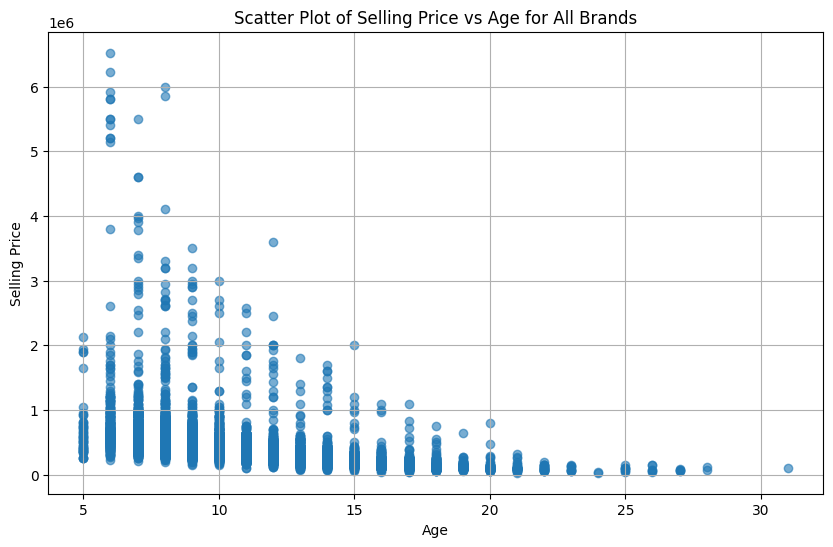

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_eda['age'], df_eda['selling_price'], alpha=0.6)

plt.title('Scatter Plot of Selling Price vs Age for All Brands')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

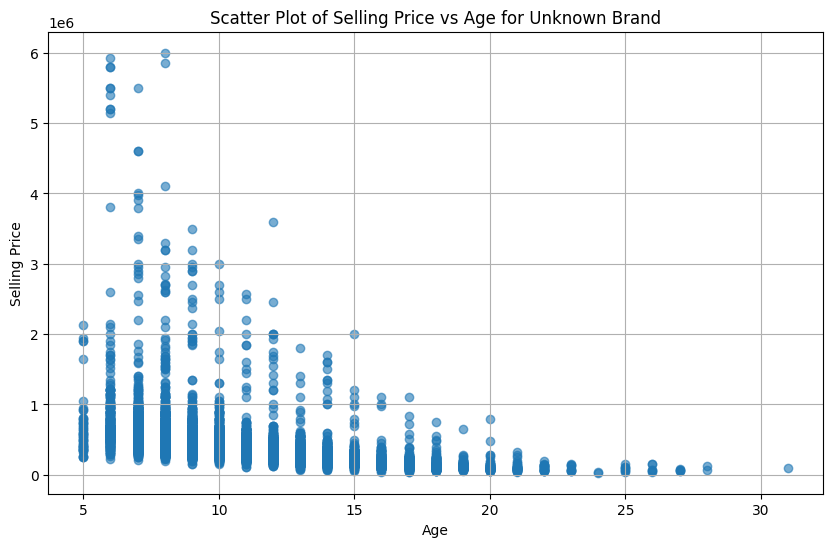

In [ ]:
# remove outlier (hilangkan top 2)
# df_processed_1 = df_processed_1[~df_eda.isin(df_eda[df_eda[df_eda['brand'] == "Unknown"].sort_values(by="selling_price").head(2)])]
df_sorted = df_eda.sort_values(
    by="selling_price", ascending=False
)

indices_to_remove = df_sorted.head(2).index

df_eda = df_eda.drop(indices_to_remove)

# check if outliers have been removed

plt.figure(figsize=(10, 6))
plt.scatter(df_eda['age'], df_eda['selling_price'], alpha=0.6)

plt.title('Scatter Plot of Selling Price vs Age for Unknown Brand')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

## ADD/REMOVE FEATURE

In [ ]:
df_eda['torque'].nunique()/df_eda.shape[0] # harusnya aman

0.0654988575780655

In [ ]:
df_eda['name'].nunique()/df_eda.shape[0]

0.2800837776085301

seperti yang bisa dilihat, ratio data dengan nama mobil unik dengan banyak keseluruhan data hampir 1/3 dari banyak data keseluruhan. Kolom nama lumayan bervariasi. Lebih baik digeneralisasikan

In [ ]:
# berikut nama-nama brand yang ada di dalam dataset.
car_brands = [
    "Ambassador",
    "Audi",
    "BMW",
    "Chevrolet",
    "Daewoo",
    "Datsun",
    "Fiat",
    "Ford",
    "Force",
    "Honda",
    "Hyundai",
    "Isuzu",
    "Jaguar",
    "Jeep",
    "Kia",
    "Land Rover",
    "Mahindra",
    "Maruti",
    "Mercedes-Benz",
    "MG",
    "Mitsubishi",
    "Nissan",
    "OpelCorsa",
    "Renault",
    "Skoda",
    "Tata",
    "Toyota",
    "Volkswagen",
    "Volvo",
    "Lexus",
    "Opel"
]

# cek apakah ada data yang nama brandnya tidak ada di array kita
brand_regex = r'^(' + '|'.join(map(re.escape, car_brands)) + r')'
df_eda[~df_eda['name'].str.contains(brand_regex, case=False, na=False, regex=True)]

/tmp/ipython-input-34-1575380325.py:38: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_eda[~df_eda['name'].str.contains(brand_regex, case=False, na=False, regex=True)]


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age


isi kolom 'brand' dengan nama brand masing-masing mobil

In [ ]:
df_eda['brand'] = df_eda['name'].str.extract(brand_regex, flags=re.IGNORECASE, expand=False)
df_eda

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,Maruti Swift VXI BS-III,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,Maruti Wagon R VXI BS-IV with ABS,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
# cek apakah semua entry sudah punya nilai brand
df_eda['brand'].isna().sum()

np.int64(0)

In [ ]:
# cek apakah sudah lebih ter-generalisasi
df_eda['name'].nunique()/df_eda.shape[0]

0.2800837776085301

In [ ]:
# drop name column karna sudah digantikan brand
df_eda = df_eda.drop(['name'],  axis=1)
df_eda

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
temp_df = df_eda.groupby('brand')['selling_price'].agg(['mean', 'count'])
temp_df = temp_df.sort_values(by="mean")
temp_df

,mean,count
brand,,
Opel,6.800000e+04,1
Daewoo,7.700000e+04,3
Ambassador,1.240000e+05,4
Mitsubishi,1.560000e+05,5
Chevrolet,2.053200e+05,161
Datsun,3.010000e+05,43
Fiat,3.116666e+05,39
Tata,3.213865e+05,481
Maruti,3.916694e+05,1822


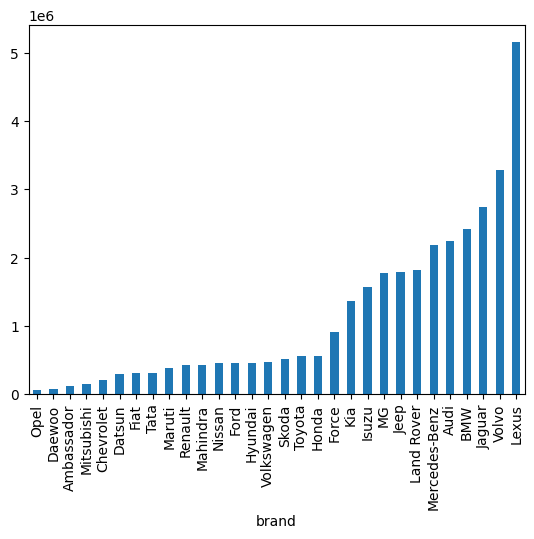

In [ ]:
ax = temp_df["mean"].plot.bar(x="car brands", y="mean")

beberapa brand sebaiknya diubah menjadi "unknown" saja karena banyak datanya terlalu sedikit. Kita anggap saja batas minimum agar brand tidak dijadikan "unknown" adalah 20 (berarti kalau count <= 19, jadikan unknown).

In [ ]:
threshold = 20
brand_count = temp_df["count"]
convert_brand_df = brand_count[brand_count < threshold]
convert_brand_df = convert_brand_df.sort_values()
print(convert_brand_df.head(30))
print(f'Total Unknown entries: {convert_brand_df.sum()}')
convert_brand_list = convert_brand_df.index.tolist()

brand
Opel          1
Force         1
Lexus         1
Isuzu         2
Land Rover    2
MG            3
Kia           3
Daewoo        3
Ambassador    4
Mitsubishi    5
Jaguar        8
Volvo         8
Name: count, dtype: int64
Total Unknown entries: 41


In [ ]:
# brands that are not set to unknown
brand_count[brand_count >= threshold].index.tolist()

['Chevrolet',
 'Datsun',
 'Fiat',
 'Tata',
 'Maruti',
 'Renault',
 'Mahindra',
 'Nissan',
 'Ford',
 'Hyundai',
 'Volkswagen',
 'Skoda',
 'Toyota',
 'Honda',
 'Jeep',
 'Mercedes-Benz',
 'Audi',
 'BMW']

Di sini kita cek apakah lebih baik entriesnya dihapus atau dijadikan "unknown".

In [ ]:
df_eda[df_eda['brand'].isin(convert_brand_list)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
127,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0,6,Lexus
128,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177.00,430Nm@ 1750-2500rpm,5.0,8,Jaguar
136,1750000,19000,Petrol,Dealer,Automatic,First Owner,13.96,1451.0,141.00,250Nm@ 1600-3600rpm,5.0,6,MG
139,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0,7,Volvo
145,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0,8,Jaguar
180,100000,60000,Petrol,Individual,Manual,First Owner,18.50,796.0,53.00,71Nm@ 3500rpm,5.0,25,Daewoo
356,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0,6,Volvo
369,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.80,1984.0,150.00,350Nm@ 1500-2750rpm,5.0,7,Volvo
448,643000,10000,Diesel,Individual,Manual,First Owner,20.80,1493.0,113.40,250nm@ 1500-2750rpm,5.0,6,Kia
983,1900000,5000,Diesel,Dealer,Automatic,First Owner,17.80,1493.0,113.40,250nm@ 1500-2750rpm,5.0,5,Kia


In [ ]:
# change to unknown
df_eda['brand'] = df_eda['brand'].replace(convert_brand_list, 'Unknown')
df_eda[df_eda['brand'].isin(convert_brand_list)]

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand


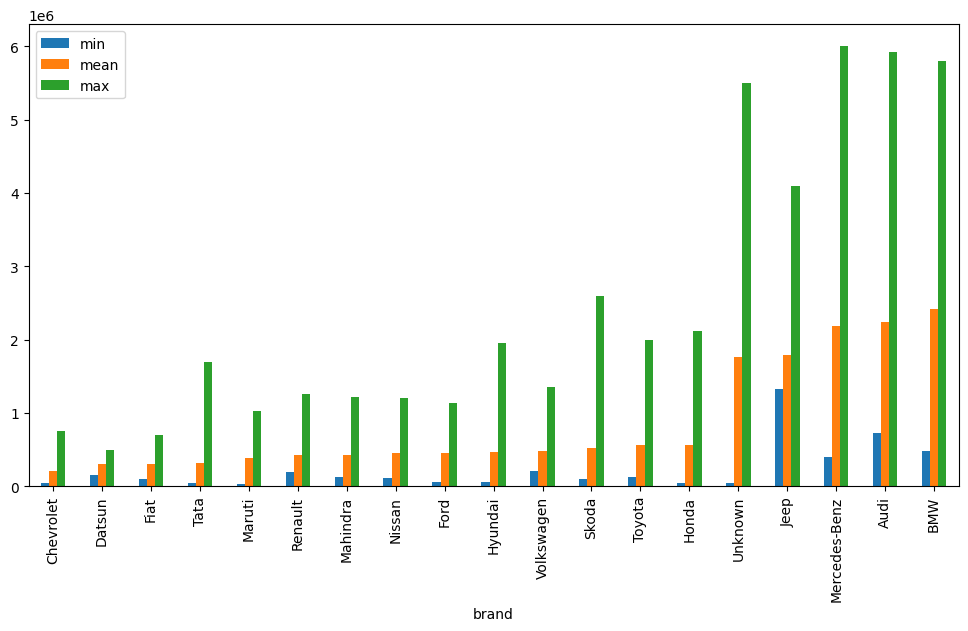

In [ ]:
# check the min,avg, and max of the low entries count brands
convert_brand_avg_df = df_eda.groupby('brand')['selling_price'].agg(['mean', 'min', 'max']).sort_values(by='mean')
ax = convert_brand_avg_df[['min', 'mean', 'max']].plot.bar(figsize=(12,6))

di grafik atas kita melihat bahwa untuk group unknown, nilai maksimum dengan minimumnya berjarak sangat jauh. Akan tetapi, merk lain juga memiliki jeda yang cukup besar. Sebenarnya, jeda yang cukup banyak ini bisa menyebabkan model kita yang MAE-nya nanti menjadi semakin besar. Namun, kita coba saja dahulu.

In [ ]:
# copy for better management (brand name checkpoint with unknown)
df_processed_1 = df_eda.copy()
df_eda

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
# copy for better management (drop brand checkpoint)
df_processed_4 = df_eda.copy().drop('brand', axis=1)
df_processed_4

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18


In [ ]:
# remove unknown entries (brand name checkpoint WITHOUT unknown)
df_eda = df_eda[df_eda['brand'] != 'Unknown']
df_processed_2 = df_eda.copy()
df_eda

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


## Correlation between features
Selanjutnya, kita akan mengecek, apakah ada fitur yang tidak terlalu berpengaruh terhadap selling price.

<Axes: >

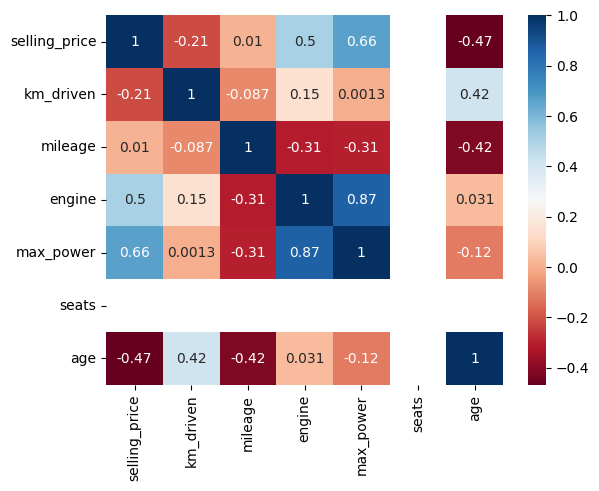

In [ ]:
import seaborn as sns

# get numerical values
df_numerical = df_processed_2.select_dtypes(include=['number'])

sns.heatmap(df_numerical.corr(), annot=True, cmap="RdBu")

Bisa dilihat bahwa seats tidak memiliki hubungan linear signifikan terhadap selling_price. Kemungkinan fitur ini bisa dihapus saja.

In [ ]:
df_processed_3 = df_eda.copy().drop('seats', axis=1)
df_processed_3

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",18,Hyundai


# Model Training
**GOAL: Mencari dataset yang paling bagus & model yang paling akurat**
- cari di mana MAE, MSE, dan RMSE terendah.
- **MAE** (mean absolute error): average of the absolute differences between predictions and actual values. (see the average error between prediction and average data that the model has)
- **MSE** (mean absolute error): sensitive terhadap outlier
- **RMSE** (root mean squared error): square root of the average of the squared differences between predictions and actual values. (Sensitive to big errors)

In [ ]:
# data with brand unknown
df_processed_1

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
# data with unknown brands removed
df_processed_2

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
# seats column dropped
df_processed_3

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",18,Hyundai


In [ ]:
# drop brand
df_processed_4

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18


prepare dataframes for processing

In [ ]:
df_processed = [df_processed_1.copy(), df_processed_2.copy(), df_processed_3.copy(), df_processed_4.copy()]
pd.set_option('display.max_columns', None) # supaya semua kolom keprint


for idx,_ in enumerate(df_processed):
  # df_processed[idx] = pd.get_dummies(data = df_processed[idx],drop_first=True)

  # turn to log1p to make numbers manageable (some regression algorithms like linear regressions expects normal distributed Y)
  df_processed[idx]['selling_price_log'] = np.log1p(df_processed[idx]['selling_price'])


  print(f"{'-'*5}DATAFRAME {idx+1}{'-'*50}")
  print(df_processed[idx], end="\n\n\n\n\n")


-----DATAFRAME 1--------------------------------------------------
      selling_price  km_driven    fuel seller_type transmission  \
0            450000     145500  Diesel  Individual       Manual   
1            370000     120000  Diesel  Individual       Manual   
2            158000     140000  Petrol  Individual       Manual   
3            225000     127000  Diesel  Individual       Manual   
4            130000     120000  Petrol  Individual       Manual   
...             ...        ...     ...         ...          ...   
6712         260000      50000  Petrol  Individual       Manual   
6713         475000      80000  Diesel  Individual       Manual   
6714         320000     110000  Petrol  Individual       Manual   
6715         135000     119000  Diesel  Individual       Manual   
6716         382000     120000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  \
0              First Owner    23.40  1248.0      74.00   
1           

In [ ]:
# CROSS-VALIDATION SPLIT, set up KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

##MODELS

In [ ]:
def trainData(df_temp):

  y_log = df_temp['selling_price_log']
  y_original = df_temp['selling_price']
  X = df_temp.drop(columns=['selling_price', 'selling_price_log'])

  numerical_features = X.select_dtypes(include=np.number).columns.tolist()
  categorical_features = X.select_dtypes(include='string').columns.tolist()

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', StandardScaler(), numerical_features),
          ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
      ],
      remainder='passthrough'
  )

  models_definitions = {
      "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
      "Decision Tree": Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(random_state=42))]),
      "Random Forest": Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=450, max_depth=12, min_samples_leaf=2, min_samples_split=5, random_state=42, n_jobs=-1))]),
      "Gradient Boosting": Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=400, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42))]),
      "XGBoost": Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective='reg:squarederror', random_state=42, n_jobs=-1))]),
      #polynomial sebenernya hasilnya bagus cumanya google colab ramnya gakuat ;_;
    #   "Polynomial Regression (Degree 2)": Pipeline([
    #     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    #     ('linear', LinearRegression())
    # ])
  }

  results = {}


  for name, model_template in models_definitions.items():
      print(f"\n--- Evaluating {name} ---")

      r2_log_folds = []
      mae_log_folds = []
      mse_log_folds = []
      rmse_log_folds = []

      r2_real_folds = []
      mae_real_folds = []
      mse_real_folds = []
      rmse_real_folds = []


      for fold_idx, (train_index, test_index) in enumerate(kf.split(X, y_log)):

          model = clone(model_template)

          # split data for the current fold
          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
          y_train_log, y_test_log = y_log.iloc[train_index], y_log.iloc[test_index]
          y_test_original = y_original.iloc[test_index]

          # Fit the model
          model.fit(X_train, y_train_log)

          # Make predictions on the log scale
          y_pred_log = model.predict(X_test)

          # Calculate metrics on the LOG scale for this fold
          r2_log_folds.append(r2_score(y_test_log, y_pred_log))
          mae_log_folds.append(mean_absolute_error(y_test_log, y_pred_log))
          mse_log_folds.append(mean_squared_error(y_test_log, y_pred_log))
          rmse_log_folds.append(np.sqrt(mean_squared_error(y_test_log, y_pred_log)))


          # Convert predictions back to original scale and calculate metrics
          y_pred_real = np.expm1(y_pred_log)

          r2_real_folds.append(r2_score(y_test_original, y_pred_real))
          mae_real_folds.append(mean_absolute_error(y_test_original, y_pred_real))
          mse_real_folds.append(mean_squared_error(y_test_original, y_pred_real))
          rmse_real_folds.append(np.sqrt(mean_squared_error(y_test_original, y_pred_real)))

      # Average the metrics across all folds
      mean_r2_log = np.mean(r2_log_folds)
      mean_mae_log = np.mean(mae_log_folds)
      mean_mse_log = np.mean(mse_log_folds)
      mean_rmse_log = np.mean(rmse_log_folds)

      mean_r2_real = np.mean(r2_real_folds)
      mean_mae_real = np.mean(mae_real_folds)
      mean_mse_real = np.mean(mse_real_folds)
      mean_rmse_real = np.mean(rmse_real_folds)


      results[name] = {
          'R2 (Log)': mean_r2_log,
          'MAE (Log)': mean_mae_log,
          'MSE (Log)': mean_mse_log,
          'RMSE (Log)': mean_rmse_log,
          'R2 (Real)': mean_r2_real,
          'MAE (Real)': mean_mae_real,
          'MSE (Real)': mean_mse_real,
          'RMSE (Real)': mean_rmse_real
      }

      print(f"  R2 (Log Scale): {mean_r2_log:.4f}")
      print(f"  MAE (Log Scale): {mean_mae_log:,.4f}")
      print(f"  MSE (Log Scale): {mean_mse_log:,.4f}")
      print(f"  RMSE (Log Scale): {mean_rmse_log:,.4f}")
      print(f"  R2 (Real Scale): {mean_r2_real:.4f}")
      print(f"  MAE (Real Scale): {mean_mae_real:,.2f}")
      print(f"  MSE (Real Scale): {mean_mse_real:,.2f}")
      print(f"  RMSE (Real Scale): {mean_rmse_real:,.2f}")

  results_df = pd.DataFrame(results).T
  print("\n" + "=" * 80)
  print("Cross-Validation Results for All Models:")
  print(results_df.round(4))

  print("\nResults sorted by MAE (Real Scale, descending):")
  print(results_df.sort_values(by='MAE (Real)').round(4))
  print("=" * 50)

In [ ]:
for idx,df_temp in enumerate(df_processed):
  print(f"{'-'*5}Dataframe {idx+1}{'-'*50}")
  trainData(df_processed[idx])
  print("\n\n\n\n\n\n")

-----Dataframe 1--------------------------------------------------

--- Evaluating Linear Regression ---
  R2 (Log Scale): 0.8786
  MAE (Log Scale): 0.1646
  MSE (Log Scale): 0.0592
  RMSE (Log Scale): 0.2427
  R2 (Real Scale): 0.8192
  MAE (Real Scale): 76,558.30
  MSE (Real Scale): 38,211,031,150.56
  RMSE (Real Scale): 191,990.36

--- Evaluating Decision Tree ---
  R2 (Log Scale): 0.8402
  MAE (Log Scale): 0.2011
  MSE (Log Scale): 0.0781
  RMSE (Log Scale): 0.2793
  R2 (Real Scale): 0.8606
  MAE (Real Scale): 85,961.77
  MSE (Real Scale): 29,117,744,658.15
  RMSE (Real Scale): 169,774.78

--- Evaluating Random Forest ---
  R2 (Log Scale): 0.9077
  MAE (Log Scale): 0.1541
  MSE (Log Scale): 0.0451
  RMSE (Log Scale): 0.2123
  R2 (Real Scale): 0.9027
  MAE (Real Scale): 68,693.31
  MSE (Real Scale): 19,889,097,254.10
  RMSE (Real Scale): 140,795.75

--- Evaluating Gradient Boosting ---
  R2 (Log Scale): 0.9149
  MAE (Log Scale): 0.1486
  MSE (Log Scale): 0.0416
  RMSE (Log Scale): 0.

Kesimpulan: Kita bisa lihat, MAE yang paling kecil adalah dataset 2 model XGBoost. R2nya juga di atas 70%, jadi kita pakai itu saja untuk aplikasi kita.

# Train Final model

In [ ]:
new_car_data = pd.DataFrame({
    'brand': ['Maruti'],            # String
    'km_driven': [60000],           # Integer
    'fuel': ['Petrol'],             # String
    'seller_type': ['Individual'],  # String
    'transmission': ['Manual'],     # String
    'owner': ['Second Owner'],      # String
    'mileage': [19.5],              # Float (kmpl)
    'engine': [1197.0],             # Float (CC)
    'max_power': [81.86],           # Float (bhp)
    'torque': [''],              # Float (Nm)
    'seats': [5],
    'age' : [11]# Float
})

In [ ]:
df_processed_2

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,11,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,11,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,19,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,15,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,12,Maruti
6713,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,11,Hyundai
6714,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,12,Hyundai
6715,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,18,Hyundai


In [ ]:
final_df = df_processed_2

y_log = df_temp['selling_price_log']
y_original = df_temp['selling_price']
X = df_temp.drop(columns=['selling_price', 'selling_price_log'])

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='string').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', xgb.XGBRegressor(random_state=42, objective='reg:squarederror', n_jobs=-1))])

model.fit(X, y_log)

# predict y log
y_pred_log = model.predict(new_car_data)

# Convert predictions back to original price scale
predicted_prices_original_scale = np.expm1(y_pred_log)
predicted_prices_original_scale

array([371096.7], dtype=float32)

# Detail for Program

In [ ]:
# data for dropdowns
print(f"Brand Names: {list(final_df.brand.unique())}")
print(f"Fuel types: {list(final_df.fuel.unique())}")
print(f"Seller types: {list(final_df.seller_type.unique())}")
print(f"Transmission types: {list(final_df.transmission.unique())}")
print(f"Owner types: {list(final_df.owner.unique())}")
print(f"Torque types: {list(final_df.torque.unique())}")

Brand Names: ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Mahindra', 'Tata', 'Datsun', 'Jeep', 'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Chevrolet', 'Fiat']
Fuel types: ['Diesel', 'Petrol', 'LPG', 'CNG']
Seller types: ['Individual', 'Dealer', 'Trustmark Dealer']
Transmission types: ['Manual', 'Automatic']
Owner types: ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']
Torque types: ['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)', '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)', '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm', '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm', '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm', '104Nm@ 4000rpm', '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 48

# Simpan Model

In [ ]:
!pip install skops
import skops.io as sio
from google.colab import files

model_filename = 'car_price_prediction_model.skops'

# The 'protocol=5' is generally recommended for compatibility
sio.dump(model, model_filename)



files.download('car_price_prediction_model.skops')

print("Download should have initiated in your browser.")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 4.8 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download should have initiated in your browser.


# REJECTED IDEA: mengurangi MAE dengan menghilangkan outlier (menggunakan modified z-score)

--- START: Preprocessing with In-Loop Outlier Removal ---
Menggunakan ambang batas Modified Z-score untuk penghapusan outlier: 2.5


========== Memproses DATAFRAME 1 ==========
  Jumlah baris awal: 5252

  Visualisasi Outlier pada 'selling_price' SEBELUM Penghapusan Modified Z-score (DataFrame 1):


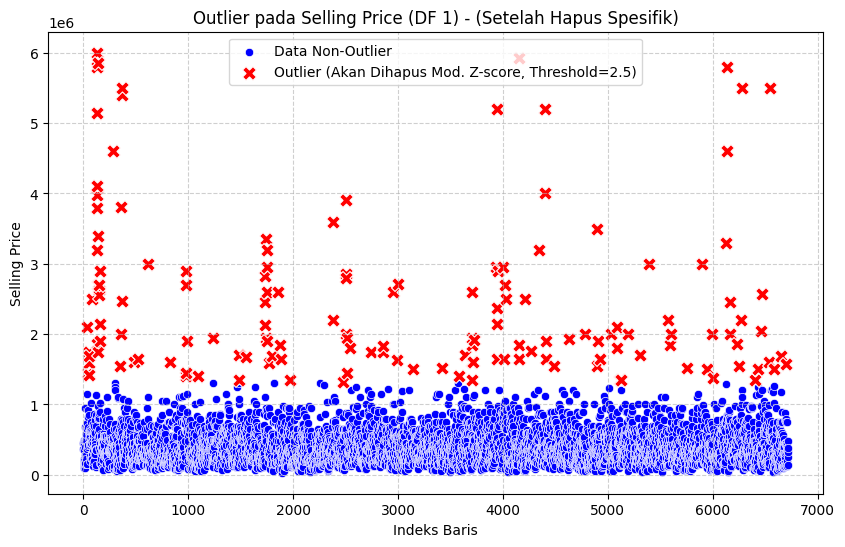

  Outlier teridentifikasi di 'selling_price' (Mod. Z-score): 149
  Contoh 2 outlier teratas di 'selling_price':
    selling_price
39        2100000
47        1450000

  Total baris yang dihapus (termasuk spesifik & Mod. Z-score): 149
  Baris tersisa setelah semua penghapusan: 5103

========== Memproses DATAFRAME 2 ==========
  Jumlah baris awal: 5211
  Specific removal for DF 2: 12 rows where 'selling_price' > 4,000,000 removed.
  Rows after specific removal: 5199

  Visualisasi Outlier pada 'selling_price' SEBELUM Penghapusan Modified Z-score (DataFrame 2):


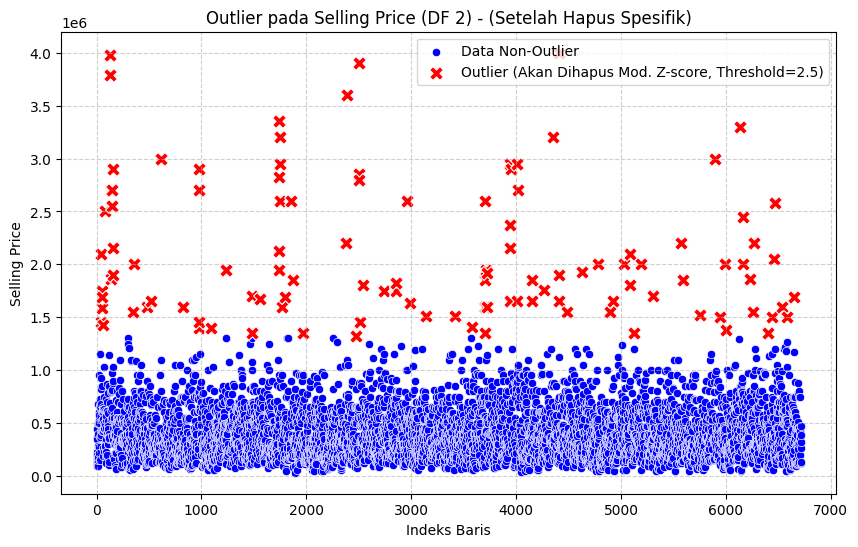

  Outlier teridentifikasi di 'selling_price' (Mod. Z-score): 113
  Contoh 2 outlier teratas di 'selling_price':
    selling_price
39        2100000
47        1450000

  Total baris yang dihapus (termasuk spesifik & Mod. Z-score): 125
  Baris tersisa setelah semua penghapusan: 5086

========== Memproses DATAFRAME 3 ==========
  Jumlah baris awal: 5211

  Visualisasi Outlier pada 'selling_price' SEBELUM Penghapusan Modified Z-score (DataFrame 3):


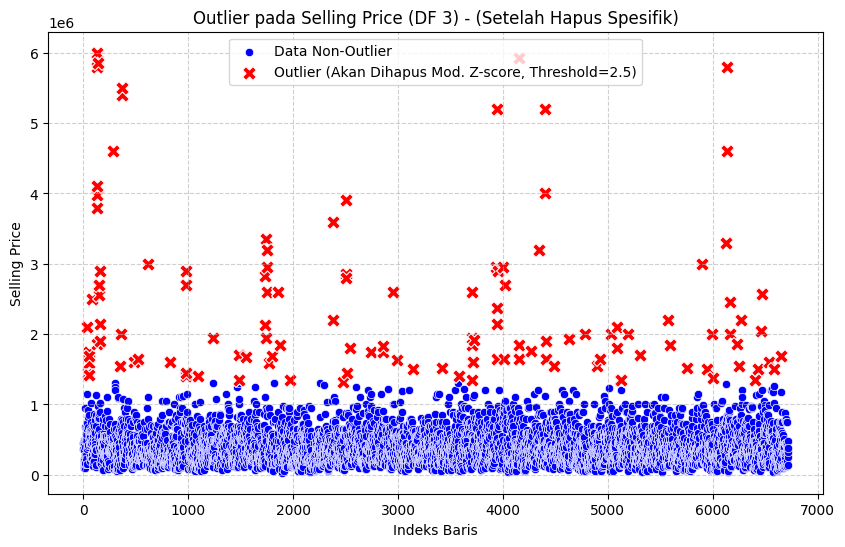

  Outlier teridentifikasi di 'selling_price' (Mod. Z-score): 125
  Contoh 2 outlier teratas di 'selling_price':
    selling_price
39        2100000
47        1450000

  Total baris yang dihapus (termasuk spesifik & Mod. Z-score): 125
  Baris tersisa setelah semua penghapusan: 5086

========== Memproses DATAFRAME 4 ==========
  Jumlah baris awal: 5252

  Visualisasi Outlier pada 'selling_price' SEBELUM Penghapusan Modified Z-score (DataFrame 4):


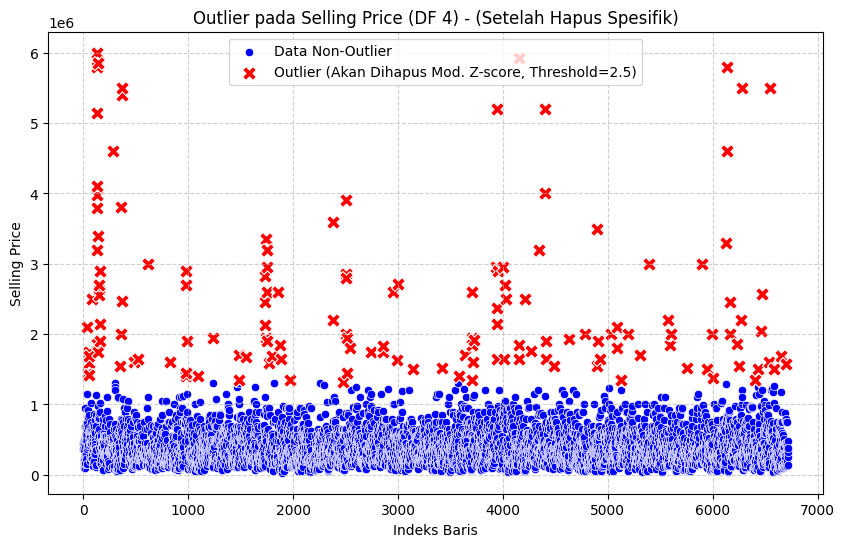

  Outlier teridentifikasi di 'selling_price' (Mod. Z-score): 149
  Contoh 2 outlier teratas di 'selling_price':
    selling_price
39        2100000
47        1450000

  Total baris yang dihapus (termasuk spesifik & Mod. Z-score): 149
  Baris tersisa setelah semua penghapusan: 5103

--- SELESAI: Preprocessing dengan Penghapusan Outlier In-Loop ---


--- START: Pengecekan Outlier Akhir pada 'selling_price_log' (Setelah semua transformasi) ---
Menggunakan ambang batas Modified Z-score untuk pengecekan akhir: 2.5


  Outlier di 'selling_price_log' (metode Modified Z-score, ambang batas 2.5) untuk DataFrame 1:
  Jumlah outlier: 2
  Contoh 2 outlier teratas di 'selling_price_log':
      selling_price_log  selling_price
1891          10.308986          30000
4044          10.414873          33351

  Visualisasi Outlier pada 'selling_price_log' (DataFrame 1) setelah pemrosesan:


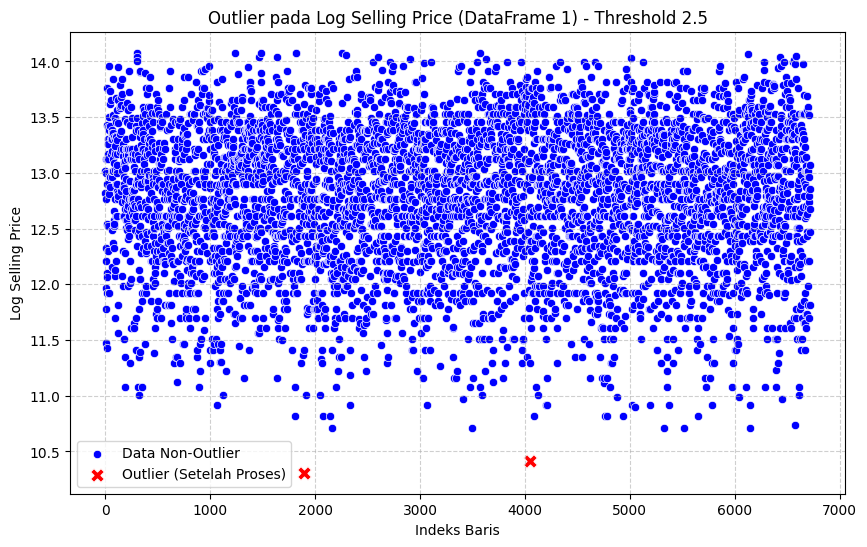


  Outlier di 'selling_price_log' (metode Modified Z-score, ambang batas 2.5) untuk DataFrame 2:
  Jumlah outlier: 2
  Contoh 2 outlier teratas di 'selling_price_log':
      selling_price_log  selling_price
1891          10.308986          30000
4044          10.414873          33351

  Visualisasi Outlier pada 'selling_price_log' (DataFrame 2) setelah pemrosesan:


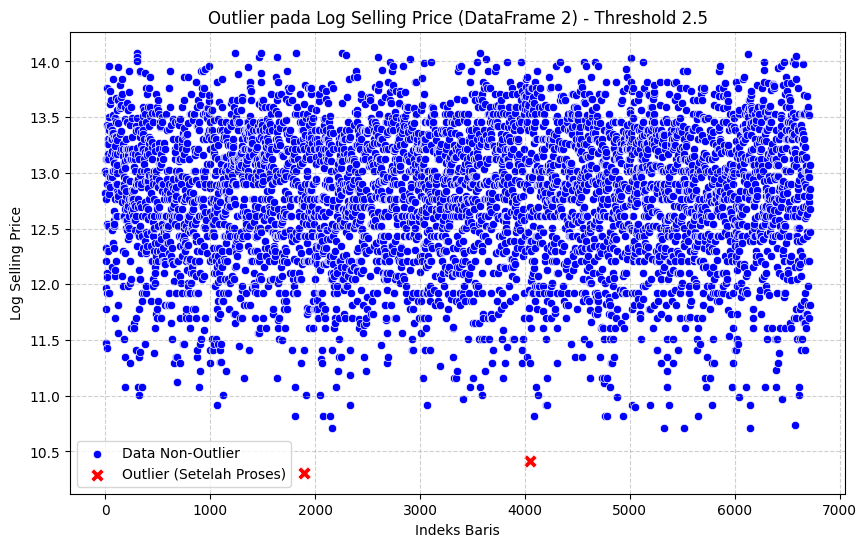


  Outlier di 'selling_price_log' (metode Modified Z-score, ambang batas 2.5) untuk DataFrame 3:
  Jumlah outlier: 2
  Contoh 2 outlier teratas di 'selling_price_log':
      selling_price_log  selling_price
1891          10.308986          30000
4044          10.414873          33351

  Visualisasi Outlier pada 'selling_price_log' (DataFrame 3) setelah pemrosesan:


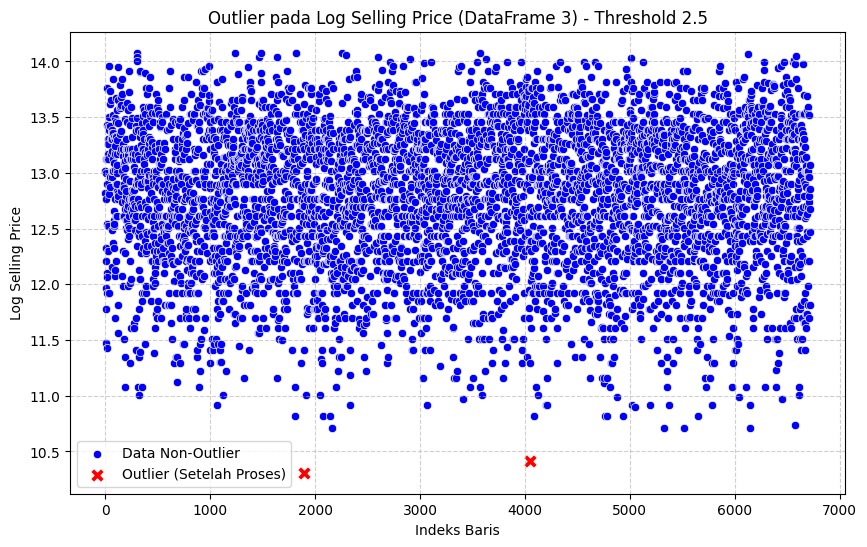


  Outlier di 'selling_price_log' (metode Modified Z-score, ambang batas 2.5) untuk DataFrame 4:
  Jumlah outlier: 2
  Contoh 2 outlier teratas di 'selling_price_log':
      selling_price_log  selling_price
1891          10.308986          30000
4044          10.414873          33351

  Visualisasi Outlier pada 'selling_price_log' (DataFrame 4) setelah pemrosesan:


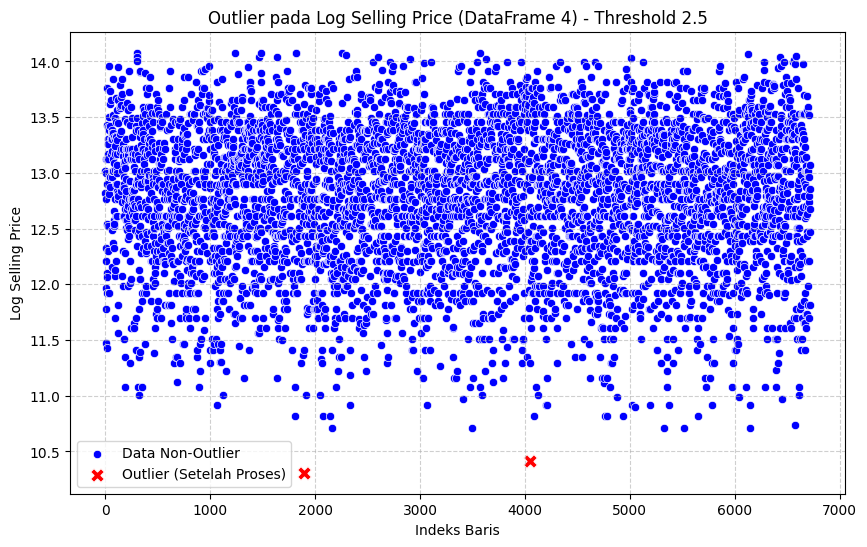


--- SELESAI: Pengecekan Outlier Akhir pada 'selling_price_log' ---


In [ ]:
import pandas as pd
import numpy as np
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk Mendeteksi Outlier ---
def find_modified_zscore_outliers(df, column, threshold):
    if not pd.api.types.is_numeric_dtype(df[column]):
        return pd.DataFrame(), pd.Series(False, index=df.index)

    column_data = df[column].dropna()

    if column_data.empty:
        return pd.DataFrame(), pd.Series(False, index=df.index)

    median = column_data.median()
    mad = robust.mad(column_data)

    if mad == 0:
        # If MAD is 0, all values are identical, so no outliers by this method.
        return pd.DataFrame(), pd.Series(False, index=df.index)

    modified_zscores = 0.6745 * (df[column] - median) / mad

    is_outlier = np.abs(modified_zscores) > threshold
    outliers = df[is_outlier]

    return outliers, is_outlier

columns_to_remove_outliers = ['selling_price']
outlier_removal_threshold = 2.5 # Ambang batas yang dipilih (misalnya 3.0)

print("--- START: Preprocessing with In-Loop Outlier Removal ---")
print(f"Menggunakan ambang batas Modified Z-score untuk penghapusan outlier: {outlier_removal_threshold}\n")


pd.set_option('display.max_columns', None)

for idx,_ in enumerate(df_processed):
    current_df = df_processed[idx]
    print(f"\n{'='*10} Memproses DATAFRAME {idx+1} {'='*10}")
    initial_rows = len(current_df)
    print(f"  Jumlah baris awal: {initial_rows}")

    # menghapus data dengan kolom 'selling_price' > 4000000
    if idx == 1:
        if 'selling_price' in current_df.columns:
            rows_removed_specific = current_df[current_df['selling_price'] > 4000000].shape[0]
            current_df = current_df[current_df['selling_price'] <= 4000000]
            print(f"  Specific removal for DF {idx+1}: {rows_removed_specific} rows where 'selling_price' > 4,000,000 removed.")
            print(f"  Rows after specific removal: {len(current_df)}")
        else:
            print(f"  Kolom 'selling_price' tidak ditemukan di DataFrame {idx+1}. Melewatkan penghapusan spesifik.")

    original_for_plot = current_df.copy()

    overall_outlier_mask = pd.Series([False] * len(current_df), index=current_df.index)

    print(f"\n  Visualisasi Outlier pada 'selling_price' SEBELUM Penghapusan Modified Z-score (DataFrame {idx+1}):")
    if 'selling_price' in current_df.columns and pd.api.types.is_numeric_dtype(current_df['selling_price']):
        outliers_for_plot_modz, is_outlier_plot_mask_modz = find_modified_zscore_outliers(current_df, 'selling_price', threshold=outlier_removal_threshold)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=current_df.index, y=current_df['selling_price'],
                        color='blue', label='Data Non-Outlier')
        sns.scatterplot(x=outliers_for_plot_modz.index, y=outliers_for_plot_modz['selling_price'],
                        color='red', label=f'Outlier (Akan Dihapus Mod. Z-score, Threshold={outlier_removal_threshold})', s=100, marker='X') # s for size, marker for shape
        plt.title(f'Outlier pada Selling Price (DF {idx+1}) - (Setelah Hapus Spesifik)')
        plt.xlabel('Indeks Baris')
        plt.ylabel('Selling Price')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  Kolom 'selling_price' tidak tersedia atau bukan numerik untuk visualisasi awal Modified Z-score.")


    for col in columns_to_remove_outliers:
        if col in current_df.columns:
            outliers_found, is_outlier_col = find_modified_zscore_outliers(current_df, col, threshold=outlier_removal_threshold)

            print(f"  Outlier teridentifikasi di '{col}' (Mod. Z-score): {len(outliers_found)}")
            if not outliers_found.empty:
                print(f"  Contoh 2 outlier teratas di '{col}':")
                print(outliers_found[[col]].head(2)) # Cetak 2 contoh outlier teratas

            overall_outlier_mask = overall_outlier_mask | is_outlier_col
        else:
            print(f"  Kolom '{col}' tidak ditemukan di DataFrame {idx+1}. Melewatkan deteksi outlier Modified Z-score.")

    # Filter DataFrame: hanya pertahankan baris yang BUKAN outlier Modified Z-score
    current_df_cleaned_modz = current_df[~overall_outlier_mask]

    # Hitung total baris yang dihapus dari awal iterasi hingga setelah ModZ-score removal
    total_removed_this_iter = initial_rows - len(current_df_cleaned_modz)
    print(f"\n  Total baris yang dihapus (termasuk spesifik & Mod. Z-score): {total_removed_this_iter}")
    print(f"  Baris tersisa setelah semua penghapusan: {len(current_df_cleaned_modz)}")

    # transformasi get_dummies dan log1p ke DataFrame yang sudah bersih
    df_processed[idx] = pd.get_dummies(data = current_df_cleaned_modz, drop_first=True)

    # Ubah ke log1p untuk membuat angka lebih mudah diatur
    df_processed[idx]['selling_price_log'] = np.log1p(df_processed[idx]['selling_price'])


print("\n--- SELESAI: Preprocessing dengan Penghapusan Outlier In-Loop ---")
print("\n" + "="*80 + "\n")

print("--- START: Pengecekan Outlier Akhir pada 'selling_price_log' (Setelah semua transformasi) ---")
print(f"Menggunakan ambang batas Modified Z-score untuk pengecekan akhir: {outlier_removal_threshold}\n")

for idx, df in enumerate(df_processed):
    if 'selling_price_log' in df.columns:
        outliers_splog_modz, is_outlier_splog_mask = find_modified_zscore_outliers(df, 'selling_price_log', threshold=outlier_removal_threshold)
        print(f"\n  Outlier di 'selling_price_log' (metode Modified Z-score, ambang batas {outlier_removal_threshold}) untuk DataFrame {idx+1}:")
        print(f"  Jumlah outlier: {len(outliers_splog_modz)}")
        if not outliers_splog_modz.empty:
            print(f"  Contoh 2 outlier teratas di 'selling_price_log':")
            print(outliers_splog_modz[['selling_price_log', 'selling_price']].head(2))
        else:
            print(f"  Tidak ada outlier ditemukan di 'selling_price_log' untuk DataFrame {idx+1}.")

        # --- VISUALISASI SETELAH PENGHAPUSAN OUTLIER DAN TRANSFORMASI LOG ---
        print(f"\n  Visualisasi Outlier pada 'selling_price_log' (DataFrame {idx+1}) setelah pemrosesan:")
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df.index, y=df['selling_price_log'],
                        color='blue', label='Data Non-Outlier')
        # Hanya plot outlier jika ada
        if not outliers_splog_modz.empty:
            sns.scatterplot(x=outliers_splog_modz.index, y=outliers_splog_modz['selling_price_log'],
                            color='red', label='Outlier (Setelah Proses)', s=100, marker='X')
        plt.title(f'Outlier pada Log Selling Price (DataFrame {idx+1}) - Threshold {outlier_removal_threshold}')
        plt.xlabel('Indeks Baris')
        plt.ylabel('Log Selling Price')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    else:
        print(f"  Kolom 'selling_price_log' tidak ditemukan di DataFrame {idx+1}. Melewatkan.")
print("\n--- SELESAI: Pengecekan Outlier Akhir pada 'selling_price_log' ---")

Mencoba melihat hasil MAE

In [ ]:
for idx,df_temp in enumerate(df_processed):
  print(f"{'-'*5}Dataframe {idx+1}{'-'*50}")
  trainData(df_processed[idx])
  print("\n\n\n\n\n\n")

-----Dataframe 1--------------------------------------------------

--- Evaluating Linear Regression ---
  R2 (Log Scale): 0.8485
  MAE (Log Scale): 0.1647
  MSE (Log Scale): 0.0603
  RMSE (Log Scale): 0.2453
  R2 (Real Scale): 0.8223
  MAE (Real Scale): 60,870.90
  MSE (Real Scale): 10,085,823,649.18
  RMSE (Real Scale): 99,465.74

--- Evaluating Decision Tree ---
  R2 (Log Scale): 0.8113
  MAE (Log Scale): 0.2001
  MSE (Log Scale): 0.0754
  RMSE (Log Scale): 0.2745
  R2 (Real Scale): 0.8138
  MAE (Real Scale): 72,233.66
  MSE (Real Scale): 10,625,192,653.93
  RMSE (Real Scale): 103,066.95

--- Evaluating Random Forest ---
  R2 (Log Scale): 0.8912
  MAE (Log Scale): 0.1525
  MSE (Log Scale): 0.0435
  RMSE (Log Scale): 0.2085
  R2 (Real Scale): 0.8853
  MAE (Real Scale): 56,133.03
  MSE (Real Scale): 6,544,074,150.16
  RMSE (Real Scale): 80,871.00

--- Evaluating Gradient Boosting ---
  R2 (Log Scale): 0.8987
  MAE (Log Scale): 0.1473
  MSE (Log Scale): 0.0405
  RMSE (Log Scale): 0.201

MAE terendah dicapai oleh model XGBOOST, dengan total sekitar 52.000